# Predict House Prices Model

# Latar Belakakng

**California Tahun 1990:** :
- **Ekonomi:** California pada tahun 1990 merupakan salah satu pusat ekonomi terbesar di dunia. Sektor teknologi, terutama di Silicon Valley, sedang dalam fase pertumbuhan yang pesat. Industri hiburan di Hollywood juga menjadi pusat produksi film dan televisi global. Selain itu, sektor pertanian dan manufaktur memberikan kontribusi signifikan terhadap ekonomi negara bagian ini.
- **Populasi:** Pada tahun 1990, populasi California telah mencapai lebih dari 29 juta orang. Pertumbuhan populasi ini didorong oleh imigrasi dari negara bagian lain dan dari luar negeri, serta tingkat kelahiran yang tinggi.
- **Kebudayaan:** California dikenal dengan keragamannya. Banyaknya imigran menciptakan beragam budaya, bahasa, dan tradisi. Industri hiburan dan seni berkembang pesat, dengan Hollywood sebagai pusatnya.
- **Lingkungan:**California menghadapi berbagai tantangan lingkungan, termasuk kekeringan, polusi udara, dan bencana alam seperti gempa bumi. Upaya konservasi lingkungan mulai mendapatkan perhatian lebih.

**California Tahun 2023:** :
- **Ekonomi:** Silicon Valley tetap menjadi pusat inovasi teknologi global, dengan perusahaan seperti Google, Apple, dan Tesla yang memimpin. Ekonomi California telah berkembang dengan lebih banyak fokus pada teknologi hijau dan energi terbarukan.
- **Populasi:**Populasi California diperkirakan telah melebihi 40 juta pada tahun 2023. Pertumbuhan populasi ini terus didorong oleh imigrasi dan tingkat kelahiran yang lebih tinggi dari tingkat kematian.
- **Kebudayaan:** California tetap menjadi pusat budaya dan hiburan, dengan banyak festival budaya, acara seni, dan produksi film dan televisi yang terkenal secara internasional.
- **Lingkungan:**Tantangan lingkungan semakin akut dengan seringnya terjadi kebakaran hutan dan kekeringan. Upaya konservasi, penggunaan energi terbarukan, dan perlindungan lingkungan menjadi fokus utama.


# Problem Statement

<p style="text-align: justify;">
Investor real estate, pembuat kebijakan, dan calon pembeli rumah sering kali mengalami kesulitan dalam memprediksi harga rumah yang akurat karena banyaknya faktor yang mempengaruhi harga tersebut. Mengidentifikasi dan memahami faktor-faktor utama yang mempengaruhi harga rumah sangat penting untuk pengambilan keputusan yang tepat.
</p>

# Goal 

<p style="text-align: justify;">
<ul>
    <li>Memprediksi Harga Rumah: Mengembangkan model regresi untuk memprediksi nilai rata-rata rumah (median_house_value) berdasarkan fitur-fitur seperti garis bujur, garis lintang, usia rata-rata rumah, jumlah kamar, jumlah kamar tidur, jumlah penduduk, jumlah rumah tangga, pendapatan rata-rata, dan kedekatan dengan laut.</li>
    <li>Mengidentifikasi Faktor Kunci: Menganalisis pentingnya berbagai fitur untuk menentukan faktor apa yang mempengaruhi perubahan harga rumah di California.</li>
    <li>Mendukung Pengambilan Keputusan: Memberikan wawasan yang dapat ditindaklanjuti bagi investor real estat, perencana kota, dan pembuat kebijakan untuk membuat keputusan yang tepat terkait dengan pasar perumahan, pembangunan perkotaan, dan keterjangkauan perumahan.</li>
    <li>Memungkinkan perencanaan keuangan dan investasi properti, analisis pasar perumahan, dan membantu calon pembeli dan penjual rumah untuk membuat keputusan yang lebih terinformasi.</li>


</ul>
</p>


# Metrics

> # EDA

In [1]:
# untuk manipulasi data
import pandas as pd
import numpy as np

# untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

# untuk menghitung Variance Inflation Factor (VIF) dalam regresi linear
from statsmodels.stats.outliers_influence import variance_inflation_factor

# untuk normalisasi dan transformasi data
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler

# untuk pembagian dataset dan validasi model
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold,KFold, RandomizedSearchCV

# untuk membangun pipeline pemrosesan data dan model
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer

# untuk model Decision Tree dan visualisasi pohon keputusan
from sklearn.tree import DecisionTreeRegressor, plot_tree

# use memory
from memory_profiler import memory_usage

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA

# untuk mengabaikan peringatan yang tidak diinginkan
import warnings
warnings.filterwarnings('ignore')


In [2]:
df_california = pd.read_csv('dataset/data_california_house.csv')
df_california.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


> ## EDA

In [3]:
df_california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [4]:
df_california.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

> Summary Statistic Descriptive

In [5]:
display(df_california.describe().T,
        df_california.describe(include='object').T)

,count,mean,std,min,25%,50%,75%,max
longitude,14448.0,-119.566647,2.006587,-124.3500,-121.8000,-118.4900,-118.0000,-114.3100
latitude,14448.0,35.630093,2.140121,32.5400,33.9300,34.2600,37.7100,41.9500
housing_median_age,14448.0,28.618702,12.596694,1.0000,18.0000,29.0000,37.0000,52.0000
total_rooms,14448.0,2640.132683,2191.612441,2.0000,1451.0000,2125.0000,3148.0000,32627.0000
total_bedrooms,14311.0,538.260709,423.577544,1.0000,295.0000,435.0000,647.0000,6445.0000
population,14448.0,1425.157323,1149.580157,3.0000,784.0000,1165.0000,1724.0000,35682.0000
households,14448.0,499.508929,383.098390,1.0000,279.0000,410.0000,604.0000,6082.0000
median_income,14448.0,3.866667,1.891158,0.4999,2.5706,3.5391,4.7361,15.0001
median_house_value,14448.0,206824.624516,115365.476182,14999.0000,119600.0000,180000.0000,263900.0000,500001.0000


,count,unique,top,freq
ocean_proximity,14448,5,<1H OCEAN,6369


> Data Understanding (Conclusion)

Berdasarkan penelurusan yang telah dilakukan dapat diketahui bahwa :
1. Dataet mempunyai 10 kolom dan 14448 baris
2. Dataset hanya mempunyai kategorikal yaitu  'ocean_proximity' dimana kolom ini memuat lokasi rumah dari ocean/sea
3. Dataset mempunya missing value 137  baris dan missing value berada pada kolom 'total_bedrooms'

-

-

> # Exploratory Data Analysis(EDA)

> EDA 1 Histogram Numeric Column

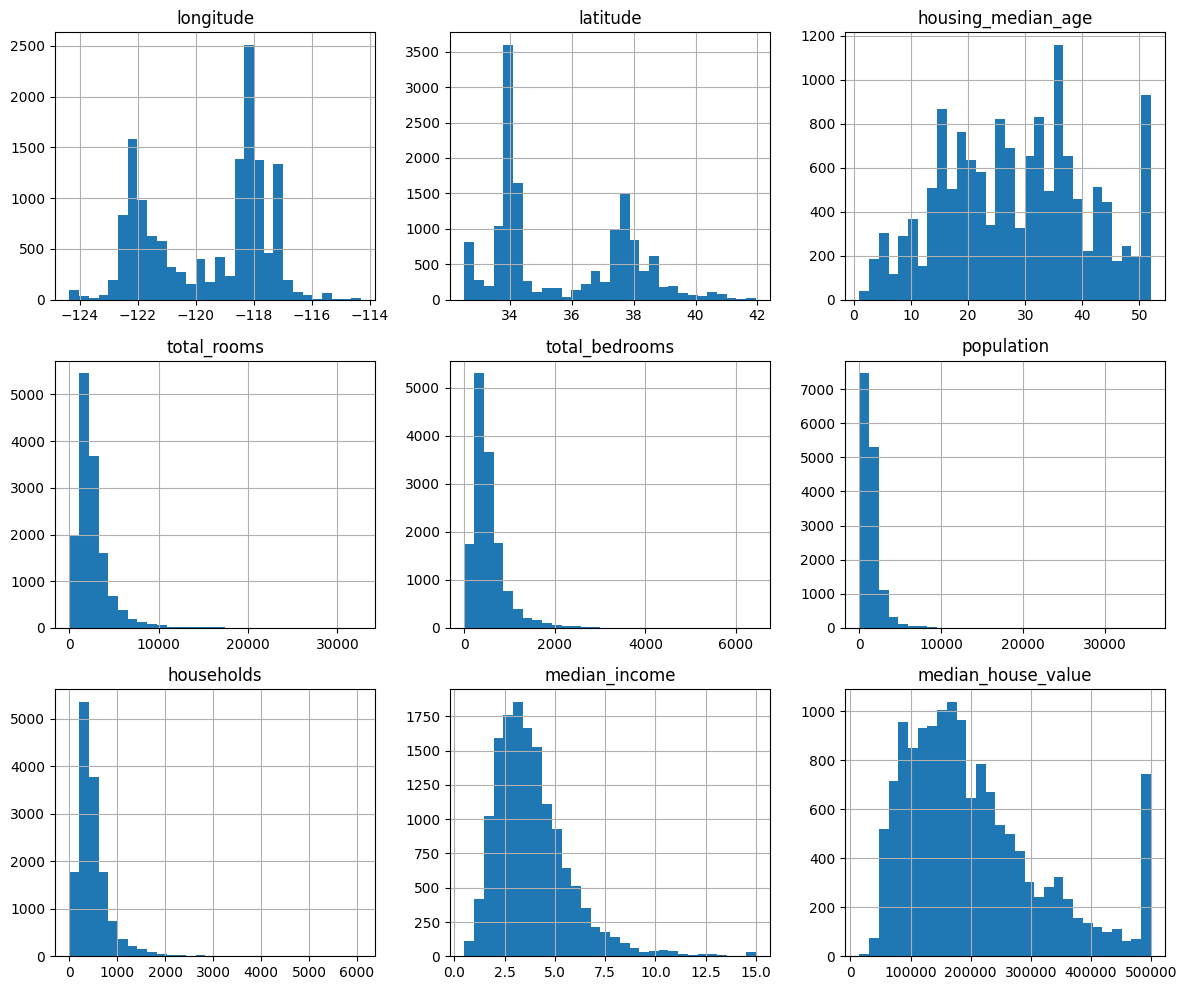

In [6]:
# Histogram from variable Numerik
df_california.hist(bins=30, figsize=(12,10))
plt.tight_layout()
plt.show()

> Corelation Metric

In [7]:
corelation = df_california.drop('ocean_proximity', axis=1).corr(method='spearman')
corelation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.879491,-0.159119,0.053617,0.075678,0.135127,0.070564,-0.006842,-0.069389
latitude,-0.879491,1.000000,0.041108,-0.033410,-0.069869,-0.136729,-0.087238,-0.091646,-0.167250
housing_median_age,-0.159119,0.041108,1.000000,-0.363420,-0.314208,-0.288264,-0.289847,-0.148067,0.072069
total_rooms,0.053617,-0.033410,-0.363420,1.000000,0.916249,0.815582,0.907105,0.271127,0.199245
total_bedrooms,0.075678,-0.069869,-0.314208,0.916249,1.000000,0.870014,0.975877,-0.002529,0.081704
population,0.135127,-0.136729,-0.288264,0.815582,0.870014,1.000000,0.902576,0.005163,-0.001653
households,0.070564,-0.087238,-0.289847,0.907105,0.975877,0.902576,1.000000,0.032316,0.108217
median_income,-0.006842,-0.091646,-0.148067,0.271127,-0.002529,0.005163,0.032316,1.000000,0.680296
median_house_value,-0.069389,-0.167250,0.072069,0.199245,0.081704,-0.001653,0.108217,0.680296,1.000000


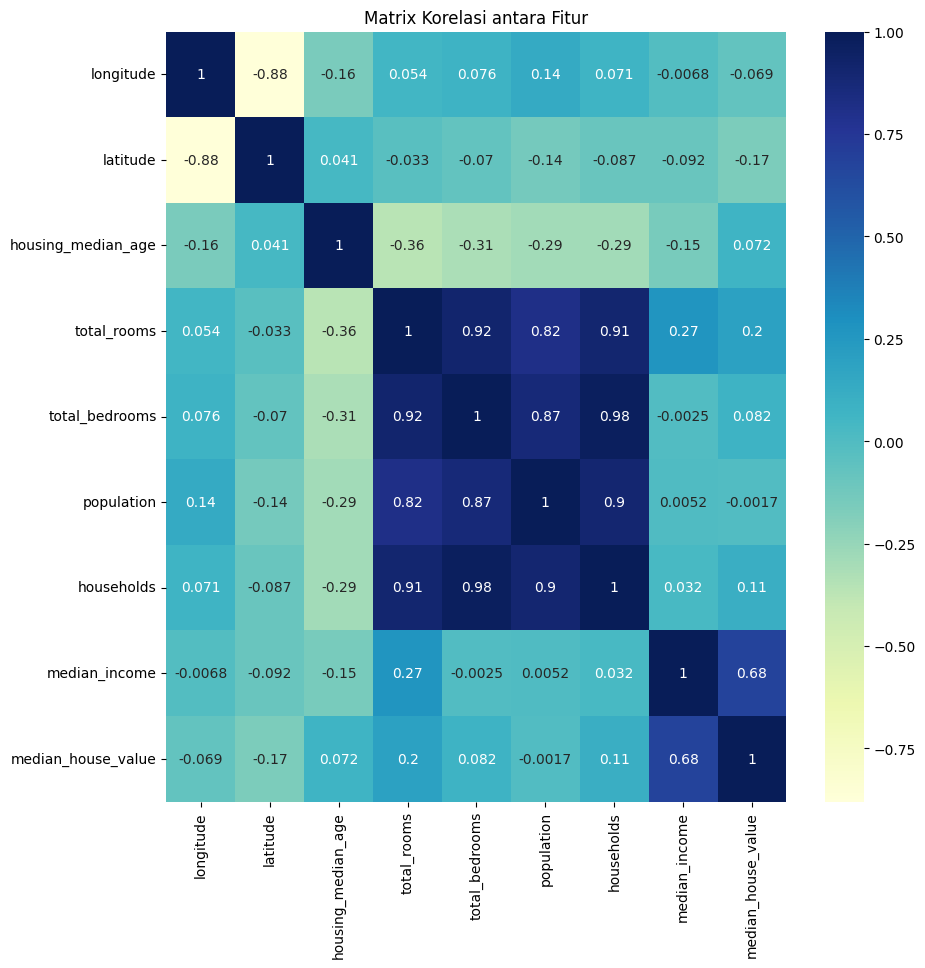

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(corelation,annot=True,cmap='YlGnBu').set_title('Matrix Korelasi antara Fitur')
plt.show()

<p style="text-align: justify;"> 
Pada "Korelasi heatmap" dapat dilihat bahwa korelasi dengan median_house_value yang tertinggi adalah pada median_income. </p>

>Map median house value 

In [9]:
import matplotlib.image as mpimg

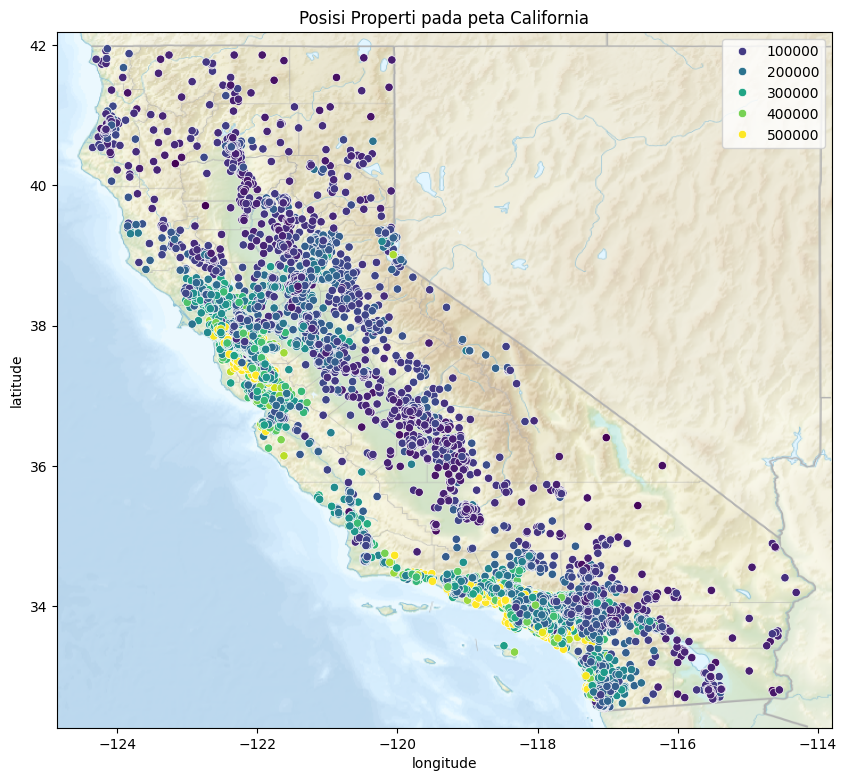

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

plt.figure(figsize=(10,10))
sns.scatterplot(data=df_california, x="longitude", y="latitude", hue=df_california['median_house_value'],palette='viridis').set_title('Posisi Properti pada peta California')

# Asumsi bahwa 'dataset\california.png' adalah path yang benar ke gambar peta
california = mpimg.imread('dataset\california.png')
plt.imshow(california, extent=[-124.86, -113.8, 32.26, 42.19], alpha=0.5, cmap='jet')

# Menampilkan legenda
plt.legend()

plt.show()


<p style="text-align: justify;"> 
Peta sebaran porperti di california dengan harga nya</p>

> ## EDA Conclusion

Conclusion :
1. Pada Histogram kita dapatlihat distribusi setiap kolom numerik. Dapat kita lihat dua kolom 'housing_median_age' dan 'median_house_value' kedua kolom terdistribusi tidak normal danmemiliki data anomali. pada kolom 'median_house_value' ada lebih dari 600 properti dengan harga $500.001 serta kolom 'housing_median_age'  memiliki lebih dari 800 properti yang berusai 52 tahun.
2. Corelation Plot dengan graph ini dapat kita ketahui bagaimana korelasi fitur terhadap target 'median_house_value'. didapatkan bahwa kolom 'median_income' adalah fitur yang memiliki korelasi terkuat dengan 'median_house_value' dan arah korelasinya adalah positif, yang berarti semakin mahal harga propertinya semagin tinggi income pemiliknya. 
3. pada Map graph dapat dilihat penyebaran properti di seluruh daerah california. propertinya di wakili dengan dot, dimana dot memiliki warna yang mencerminkan harga properti semakin kuning warnanya semakin mahal harga propertitnya dan properti yang mahal berada di dekat garis pantai.

> ## Data PreProcessing

<p style="text-align: justify;"> 
Setelah data kita breakdown pada EDA, mari kita pre-process data-data nya agar sesuai dengan kebutuhan analisis serta pembuatan model. 
<br>
1. Duplicates
<br>
2. Missing Value
<br>
3. Outliers
 </p>


### Duplicate Data

In [11]:
df_california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [12]:
df_california.duplicated().sum()

0

### Missing Value

In [13]:
df_california.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [14]:
df_california['total_bedrooms'].fillna(df_california['total_bedrooms'].median(), inplace=True)

Outlier Data

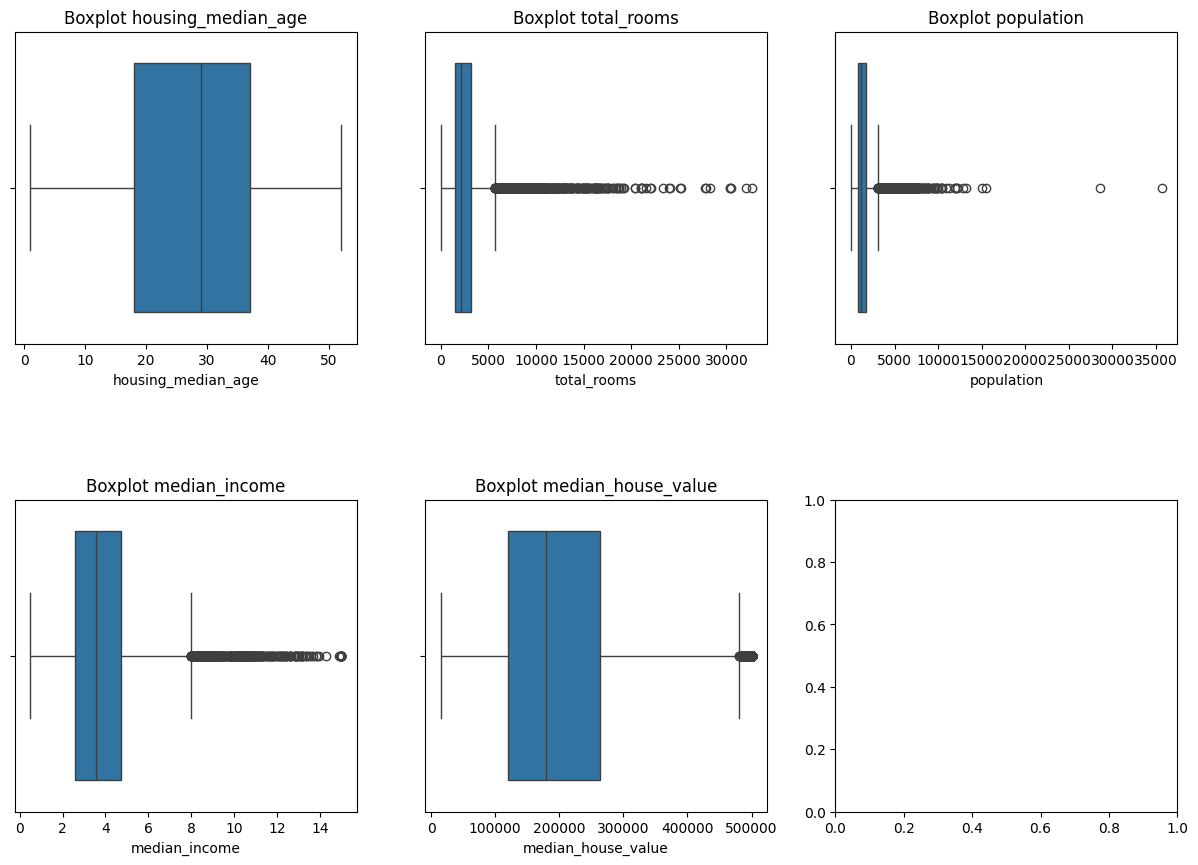

In [15]:
kolom = [ 'housing_median_age', 'total_rooms',
                    'population','median_income', 'median_house_value']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(bottom=0.1, hspace=0.5)

for i, col in enumerate(kolom):
    baris, kolom = divmod(i, 3)
    sns.boxplot(x=df_california[col], ax=axes[baris, kolom])
    axes[baris, kolom].set_title(f'Boxplot {col}')

Outlier yang ada merupakan bagian dari distribusi yang sebenarnya dan mencerminkan variabilitas alami dalam populasi, jika dihapus dapat menghilangkan informasi yang berharga.

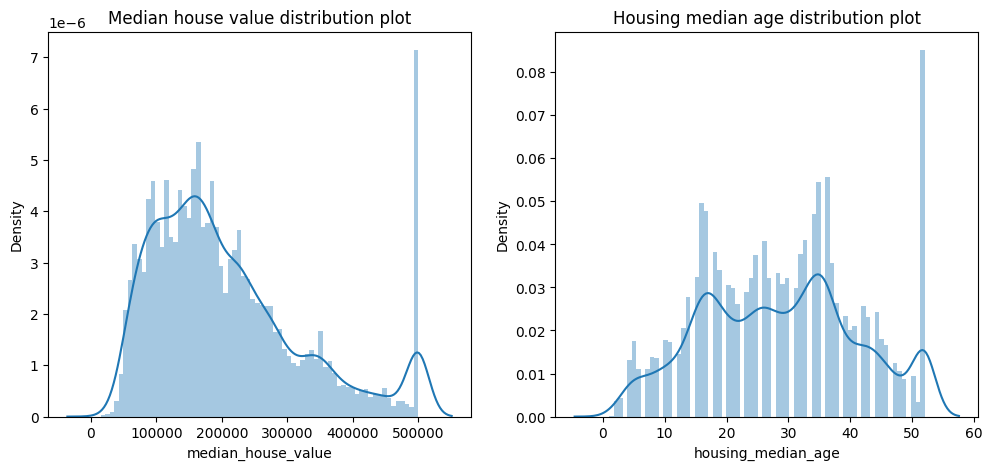

In [16]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(df_california['median_house_value'],kde=True,bins=70).set_title('Median house value distribution plot')
plt.subplot(1,2,2)
sns.distplot(df_california['housing_median_age'],kde=True,bins=70).set_title('Housing median age distribution plot')
plt.show()

Remove Outlier

In [17]:
df_california = df_california.query('median_house_value != 500001.0 and housing_median_age != 52.0')

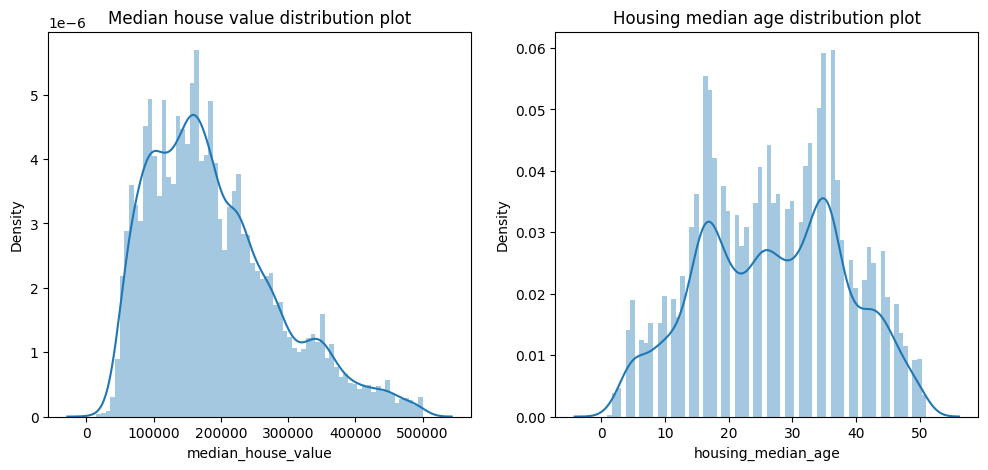

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(df_california['median_house_value'],kde=True,bins=70).set_title('Median house value distribution plot')
plt.subplot(1,2,2)
sns.distplot(df_california['housing_median_age'],kde=True,bins=70).set_title('Housing median age distribution plot')
plt.show()

> Conclusion

1. Duplicate Data : Tidak ada duplicate data pada dataset
2. Missing Value : Pada missing value yang ditemukan pada kolom 'total_bedrooms' diputuskan mengisi dengan median karena tidak terdistribusi secara normal dan terdapat outlier.
3. Outliers : Dalam dataset median_house_value, terdapat 678 data dengan nilai $500,001 yang dianggap tidak wajar. Hal ini kemungkinan merupakan kesalahan pencatatan atau pengumpulan data. Karena nilai tersebut tidak akurat, diputuskan untuk menghapusnya dari dataset. Selain itu, pada kolom housing_median_age, ada 896 properti dengan usia 52 tahun. Meskipun ini mungkin benar, ada kecurigaan bahwa rumah yang lebih tua dari 51 tahun dikelompokkan ke dalam kategori ini. Untuk menghindari bias dan memastikan konsistensi dalam model, data ini akan dihapus. Selain itu, diputuskan untuk mengubah data rumah berumur 51 tahun menjadi 50 tahun. Langkah ini bertujuan untuk menyederhanakan dan menstandarisasi dataset untuk keperluan machine learning, sehingga model yang dihasilkan lebih sederhana dan konsisten.

> # Feature Enginering

add new feature 

In [19]:
df_california['rooms_per_household'] = df_california['total_rooms'] / df_california['households']
df_california['population_per_household'] = df_california['population'] / df_california['households']


1. informasi tambahan mengenai ketersediaan ruang dalam perumahan. <br>
2. Rasio jumlah penduduk terhadap jumlah rumah tangga dapat memberikan indikasi kepadatan penduduk di suatu area. <br>
3. Rasio jumlah kamar tidur terhadap jumlah kamar total dapat menunjukkan seberapa banyak kamar tidur dibandingkan dengan ruang lain. <br>


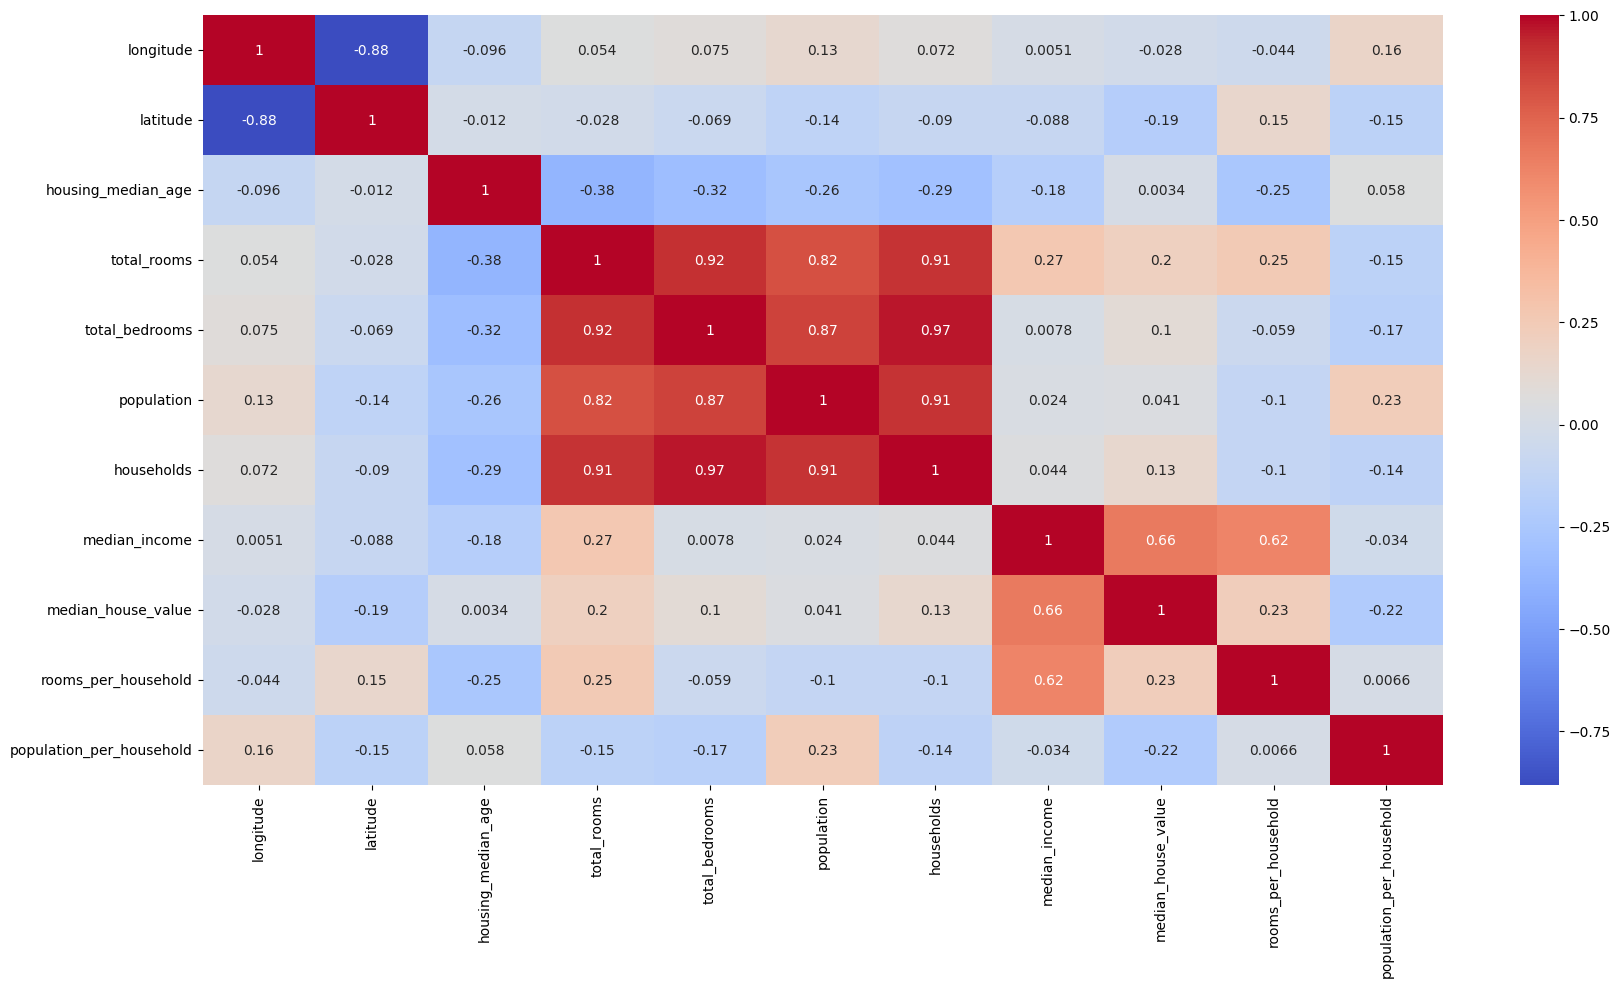

In [20]:
# Display the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.heatmap(df_california[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'rooms_per_household',
       'population_per_household']].corr(method='spearman'), annot=True, cmap='coolwarm')
plt.show()

> # Model

> save data

In [21]:
# df_california.to_csv('data_baru.csv')

In [22]:
# Memisahkan fitur dan target
feature = df_california.drop(['median_house_value'], axis=1)
target = df_california['median_house_value']


X = feature  
y = target   

>  Split dataset into training+validation and test sets

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.2, 
    random_state = 2020)

> ## Data Transformation

In [24]:
# Memisahkan kolom numerik dan kategorikal
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Menentukan kolom yang akan di-scaling dan yang tidak
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove('longitude')
numeric_features.remove('latitude')
exclude_scaling = ['longitude', 'latitude']
numeric_features_to_scale = [col for col in numeric_features if col not in exclude_scaling]
poly_features = ['median_income', 'rooms_per_household', 'population_per_household']

In [25]:
# Fitur yang akan diterapkan polynomial
poly_features = ['median_income', 'rooms_per_household', 'population_per_household']

# Fitur numerik lainnya yang tidak diterapkan polynomial
other_numeric_features = [col for col in numeric_features if col not in poly_features]

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd

# Definisi LogTransformer
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Jika input berupa numpy array, ubah menjadi DataFrame pandas
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X, columns=self.columns)
        
        X_copy = X.copy()
        for column in self.columns:
            X_copy[column] = np.log(X_copy[column] + 1)
        
        return X_copy.values  # Kembalikan sebagai numpy array
    
    def get_feature_names_out(self, input_features=None):
        return self.columns

In [27]:
from sklearn.impute import SimpleImputer, KNNImputer
imputer_longitude_latitude = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5))
])

In [28]:
# Pipeline untuk kolom numerik tanpa polynomial
other_numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('log_transform', LogTransformer(columns=other_numeric_features)),
    ('scaler', StandardScaler())
])

In [29]:
# Pipeline untuk kolom yang diterapkan polynomial
poly_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('log_transform', LogTransformer(columns=poly_features)),
    ('polynomial', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler())  # Scaling dilakukan setelah fitur polynomial diterapkan
])

In [30]:
# Fit OneHotEncoder on the combined data
onehot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

In [31]:
# ColumnTransformer untuk menggabungkan semua pipeline
transformer = ColumnTransformer(transformers=[
    ('num', other_numeric_pipeline, other_numeric_features),
    ('poly', poly_pipeline, poly_features),
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('knn_imputer', imputer_longitude_latitude, exclude_scaling)
])

In [32]:
# # ColumnTransformer untuk menggabungkan semua pipeline
# transformer = ColumnTransformer(transformers=[
#     ('num', numeric_pipeline, numeric_features),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features),
#     ('knn_imputer', imputer_longitude_latitude, exclude_scaling)
# ])


In [33]:
# Fit and transform the data
X_train_preprocessed = transformer.fit_transform(X_train)
X_test_preprocessed = transformer.transform(X_test)

In [34]:
X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)
X_train_preprocessed

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.146386,-0.388607,-0.986989,-0.475968,-0.705619,1.140414,0.798141,0.580671,1.166637,1.182494,...,0.990990,0.660460,0.176872,1.0,0.0,0.0,0.0,0.0,-118.68,34.27
1,-1.983622,0.307873,-0.017845,-0.000652,-0.037140,1.056327,0.934607,0.064353,1.062803,1.184843,...,0.813756,0.283975,-0.039169,0.0,1.0,0.0,0.0,0.0,-121.34,37.98
2,0.593329,-0.958706,-1.130661,-0.287788,-0.868535,0.409992,-0.340637,1.597052,0.316414,0.096599,...,0.388615,1.051568,0.699118,1.0,0.0,0.0,0.0,0.0,-121.84,37.34
3,-2.769745,-0.389463,-0.222638,-0.151059,-0.112900,0.110881,-0.776962,-0.141100,0.001990,-0.292179,...,-0.715974,-0.368507,-0.116614,0.0,1.0,0.0,0.0,0.0,-121.90,38.02
4,-2.211982,2.109182,2.411870,2.303307,2.274768,-0.773583,-0.277326,0.125009,-0.813036,-0.696433,...,-0.216128,-0.044560,-0.015397,0.0,1.0,0.0,0.0,0.0,-116.47,33.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10395,0.649531,-0.496469,-0.669053,-0.176259,-0.580531,-0.982369,0.157895,1.085927,-0.980417,-0.701770,...,0.635182,0.840858,0.419687,0.0,1.0,0.0,0.0,0.0,-119.50,36.62
10396,-2.769745,0.907880,0.777345,0.533871,0.792937,-0.676936,0.361111,-0.694719,-0.732320,-0.407080,...,-0.109349,-0.423054,-0.302625,0.0,1.0,0.0,0.0,0.0,-116.87,33.76
10397,-1.126989,1.441705,0.951232,1.033703,0.898603,1.146272,1.587057,0.369601,1.173928,1.591589,...,1.660497,0.748786,0.084762,0.0,1.0,0.0,0.0,0.0,-119.58,36.83
10398,0.704149,-1.066548,-1.088068,-0.808576,-0.868535,0.473221,-0.629424,0.102430,0.385391,0.009594,...,-0.506144,-0.168900,-0.024295,1.0,0.0,0.0,0.0,0.0,-118.32,33.91


In [35]:
transformer.transformers_

[('num',
  Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                  ('log_transform',
                   LogTransformer(columns=['housing_median_age', 'total_rooms',
                                           'total_bedrooms', 'population',
                                           'households'])),
                  ('scaler', StandardScaler())]),
  ['housing_median_age',
   'total_rooms',
   'total_bedrooms',
   'population',
   'households']),
 ('poly',
  Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                  ('log_transform',
                   LogTransformer(columns=['median_income', 'rooms_per_household',
                                           'population_per_household'])),
                  ('polynomial',
                   PolynomialFeatures(degree=3, include_bias=False)),
                  ('scaler', StandardScaler())]),
  ['median_income', 'rooms_per_household', 'population_per_household']),
 ('onehot', OneHotEncoder(handl

In [36]:
transformer

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('log_transform',
                                                  LogTransformer(columns=['housing_median_age',
                                                                          'total_rooms',
                                                                          'total_bedrooms',
                                                                          'population',
                                                                          'households'])),
                                                 ('scaler', StandardScaler())]),
                                 ['housing_median_age', 'total_rooms',
                                  'total_bedrooms', 'population',
                                  'households']),
                                ('poly',
                                 Pipeline(...
                                                                          'rooms_per_household',
                                                                          'population_per_household'])),
                                                 ('polynomial',
                                                  PolynomialFeatures(degree=3,
                                                                     include_bias=False)),
                                                 ('scaler', StandardScaler())]),
                                 ['median_income', 'rooms_per_household',
                                  'population_per_household']),
                                ('onehot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['ocean_proximity']),
                                ('knn_imputer',
                                 Pipeline(steps=[('imputer', KNNImputer())]),
                                 ['longitude', 'latitude'])])

In [37]:
transformer.transformers_[0][1]

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('log_transform',
                 LogTransformer(columns=['housing_median_age', 'total_rooms',
                                         'total_bedrooms', 'population',
                                         'households'])),
                ('scaler', StandardScaler())])

In [38]:
transformer.transformers_[0][1].get_feature_names_out()

array(['housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households'], dtype=object)

In [39]:
transformer.transformers_[1][1]

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('log_transform',
                 LogTransformer(columns=['median_income', 'rooms_per_household',
                                         'population_per_household'])),
                ('polynomial',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler())])

In [40]:
transformer.transformers_[1][1].get_feature_names_out()

array(['median_income', 'rooms_per_household', 'population_per_household',
       'median_income^2', 'median_income rooms_per_household',
       'median_income population_per_household', 'rooms_per_household^2',
       'rooms_per_household population_per_household',
       'population_per_household^2', 'median_income^3',
       'median_income^2 rooms_per_household',
       'median_income^2 population_per_household',
       'median_income rooms_per_household^2',
       'median_income rooms_per_household population_per_household',
       'median_income population_per_household^2',
       'rooms_per_household^3',
       'rooms_per_household^2 population_per_household',
       'rooms_per_household population_per_household^2',
       'population_per_household^3'], dtype=object)

In [41]:
transformer.transformers_[2][1]

OneHotEncoder(handle_unknown='ignore')

In [42]:
transformer.transformers_[2][1].get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [43]:
transformer.transformers_[3][1]

Pipeline(steps=[('imputer', KNNImputer())])

In [44]:
transformer.transformers_[3][1].get_feature_names_out()

array(['longitude', 'latitude'], dtype=object)

In [45]:
num_features = transformer.transformers_[0][1].get_feature_names_out()
poly_features = transformer.transformers_[1][1].get_feature_names_out()
cat_features = transformer.transformers_[2][1].get_feature_names_out()
knn_features = transformer.transformers_[3][1].get_feature_names_out()
# Convert the arrays to lists and concatenate them
features = list(num_features) + list(poly_features) +list(cat_features) + list(knn_features)

# Display the combined feature names
print(features)

['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'population_per_household', 'median_income^2', 'median_income rooms_per_household', 'median_income population_per_household', 'rooms_per_household^2', 'rooms_per_household population_per_household', 'population_per_household^2', 'median_income^3', 'median_income^2 rooms_per_household', 'median_income^2 population_per_household', 'median_income rooms_per_household^2', 'median_income rooms_per_household population_per_household', 'median_income population_per_household^2', 'rooms_per_household^3', 'rooms_per_household^2 population_per_household', 'rooms_per_household population_per_household^2', 'population_per_household^3', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN', 'longitude', 'latitude']


In [46]:
len(features)

31

In [47]:
X_train_preprocessed.columns = features
X_test_preprocessed.columns = features
X_train_preprocessed

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,median_income^2,median_income rooms_per_household,...,rooms_per_household^2 population_per_household,rooms_per_household population_per_household^2,population_per_household^3,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,longitude,latitude
0,0.146386,-0.388607,-0.986989,-0.475968,-0.705619,1.140414,0.798141,0.580671,1.166637,1.182494,...,0.990990,0.660460,0.176872,1.0,0.0,0.0,0.0,0.0,-118.68,34.27
1,-1.983622,0.307873,-0.017845,-0.000652,-0.037140,1.056327,0.934607,0.064353,1.062803,1.184843,...,0.813756,0.283975,-0.039169,0.0,1.0,0.0,0.0,0.0,-121.34,37.98
2,0.593329,-0.958706,-1.130661,-0.287788,-0.868535,0.409992,-0.340637,1.597052,0.316414,0.096599,...,0.388615,1.051568,0.699118,1.0,0.0,0.0,0.0,0.0,-121.84,37.34
3,-2.769745,-0.389463,-0.222638,-0.151059,-0.112900,0.110881,-0.776962,-0.141100,0.001990,-0.292179,...,-0.715974,-0.368507,-0.116614,0.0,1.0,0.0,0.0,0.0,-121.90,38.02
4,-2.211982,2.109182,2.411870,2.303307,2.274768,-0.773583,-0.277326,0.125009,-0.813036,-0.696433,...,-0.216128,-0.044560,-0.015397,0.0,1.0,0.0,0.0,0.0,-116.47,33.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10395,0.649531,-0.496469,-0.669053,-0.176259,-0.580531,-0.982369,0.157895,1.085927,-0.980417,-0.701770,...,0.635182,0.840858,0.419687,0.0,1.0,0.0,0.0,0.0,-119.50,36.62
10396,-2.769745,0.907880,0.777345,0.533871,0.792937,-0.676936,0.361111,-0.694719,-0.732320,-0.407080,...,-0.109349,-0.423054,-0.302625,0.0,1.0,0.0,0.0,0.0,-116.87,33.76
10397,-1.126989,1.441705,0.951232,1.033703,0.898603,1.146272,1.587057,0.369601,1.173928,1.591589,...,1.660497,0.748786,0.084762,0.0,1.0,0.0,0.0,0.0,-119.58,36.83
10398,0.704149,-1.066548,-1.088068,-0.808576,-0.868535,0.473221,-0.629424,0.102430,0.385391,0.009594,...,-0.506144,-0.168900,-0.024295,1.0,0.0,0.0,0.0,0.0,-118.32,33.91


In [48]:
transformer

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('log_transform',
                                                  LogTransformer(columns=['housing_median_age',
                                                                          'total_rooms',
                                                                          'total_bedrooms',
                                                                          'population',
                                                                          'households'])),
                                                 ('scaler', StandardScaler())]),
                                 ['housing_median_age', 'total_rooms',
                                  'total_bedrooms', 'population',
                                  'households']),
                                ('poly',
                                 Pipeline(...
                                                                          'rooms_per_household',
                                                                          'population_per_household'])),
                                                 ('polynomial',
                                                  PolynomialFeatures(degree=3,
                                                                     include_bias=False)),
                                                 ('scaler', StandardScaler())]),
                                 ['median_income', 'rooms_per_household',
                                  'population_per_household']),
                                ('onehot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['ocean_proximity']),
                                ('knn_imputer',
                                 Pipeline(steps=[('imputer', KNNImputer())]),
                                 ['longitude', 'latitude'])])

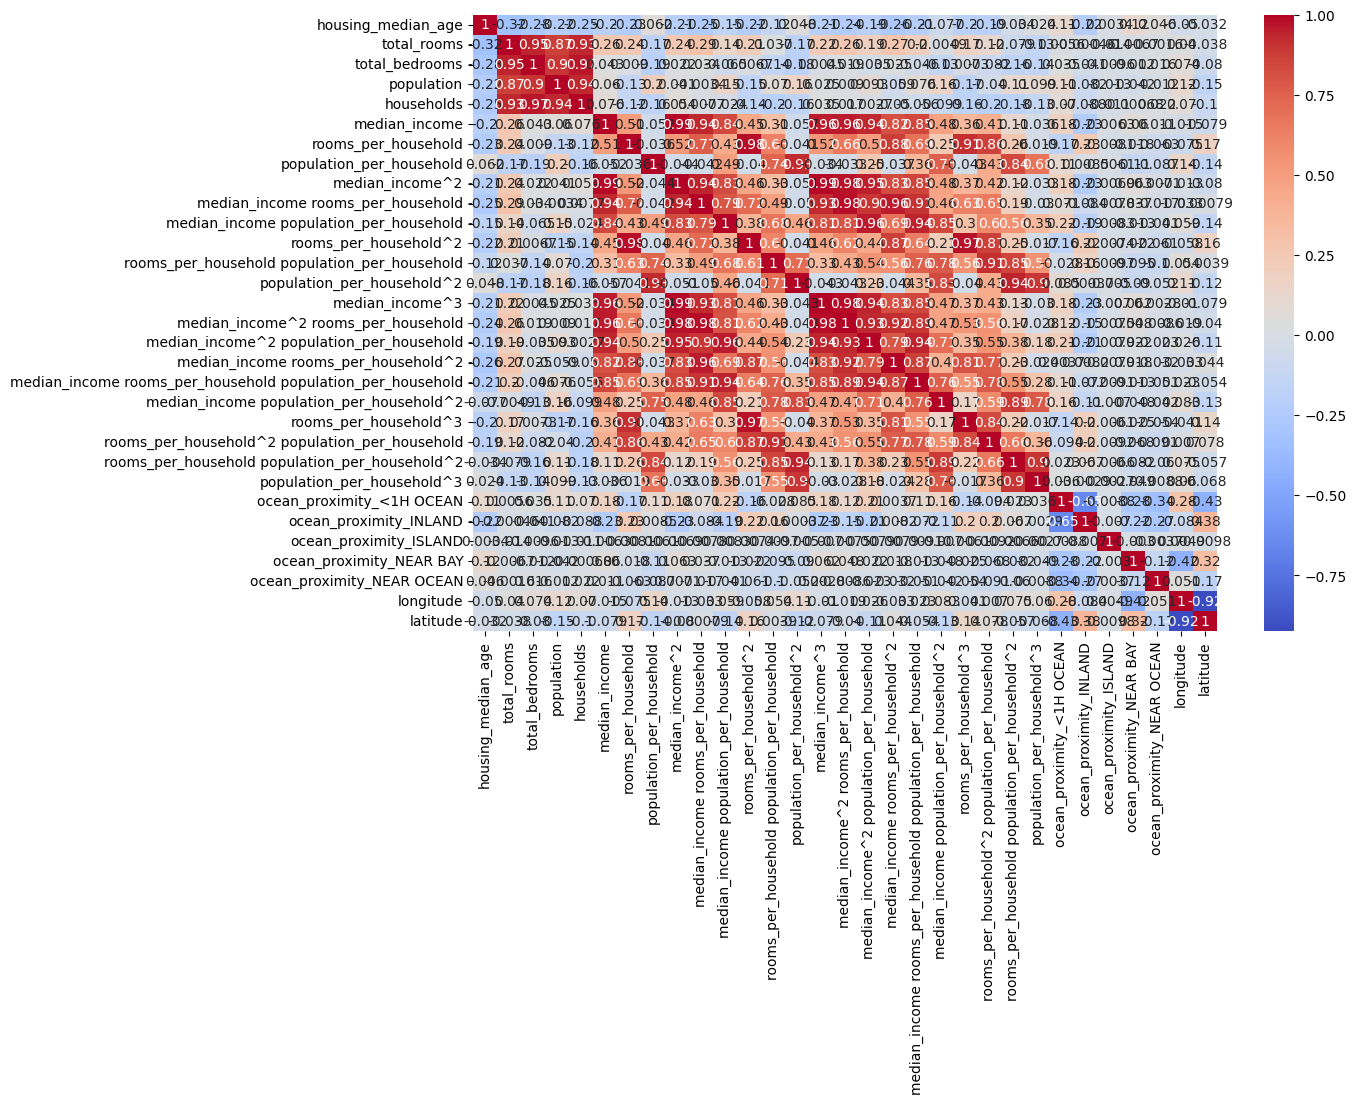

In [49]:
# Display the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(X_train_preprocessed.corr(), annot=True, cmap='coolwarm')
plt.show()

> Model

In [50]:
# untuk model Knn
from sklearn.neighbors import KNeighborsRegressor

# untuk model Random Forest
from sklearn.ensemble import RandomForestRegressor

# untuk model XGBoost
from xgboost import XGBRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

# untuk evaluasi model regresi
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_absolute_percentage_error, r2_score


In [51]:
knn = KNeighborsRegressor()
tree = DecisionTreeRegressor(random_state=2020)
rf = RandomForestRegressor(random_state=2020)
xgb_model = xgb.XGBRegressor(random_state=2020)
# baru
gbr = GradientBoostingRegressor(random_state=2020)
abr = AdaBoostRegressor(random_state=2020)

In [52]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score, mean_absolute_percentage_error
import psutil
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DecisionTree
from sklearn.ensemble import RandomForestRegressor as RandomForest, GradientBoostingRegressor as GBR, AdaBoostRegressor as ABR
import xgboost as xgb

In [53]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import xgboost as xgb

# Model dictionary
models = {
    "KNN": knn,
    "Decision Tree": tree,
    "Random Forest": rf,
    "XGBoost": xgb_model,
    "Gradient Boosting": gbr,
    "AdaBoost": abr
}

# Create custom scorers for MAE and R2
scorers = {
    'MAE': make_scorer(mean_absolute_error),
    'MAPE': make_scorer(mean_absolute_percentage_error),
    'R2': make_scorer(r2_score)
}

# Initialize results lists
model_name = []
mae_mean_value = []
mae_std_value = []
mape_mean_value = []
mape_std_value = []
r2_mean_value = []
r2_std_value = []

# Train and evaluate each model
for name, model in models.items():
    kf = KFold(n_splits=5, shuffle=True, random_state=2020)
    
    estimator = Pipeline([
        ('transformer', transformer),
        ('model', model)
    ])
    
    # Evaluate model with cross-validation for MAE and R2
    cv_results = cross_validate(
        estimator,
        X_train,
        y_train,
        cv=kf,
        scoring=scorers,
        error_score='raise',
        return_train_score=False
    )
    
    # Store results
    model_name.append(name)
    mae_mean_value.append(cv_results['test_MAE'].mean())
    mae_std_value.append(cv_results['test_MAE'].std())
    
    mape_mean_value.append(cv_results['test_MAPE'].mean())
    mape_std_value.append(cv_results['test_MAPE'].std())
    
    r2_mean_value.append(cv_results['test_R2'].mean())
    r2_std_value.append(cv_results['test_R2'].std())
    
    print(f"{name} - MAE: {cv_results['test_MAE']}, MAPE: {cv_results['test_MAPE']} ,R2: {cv_results['test_R2']}")


KNN - MAE: [36044.52884615 35774.07730769 35982.20230769 35340.01884615
 37084.15394231], MAPE: [0.20781648 0.21257867 0.20991808 0.21762932 0.20416628] ,R2: [0.70417785 0.69154519 0.69796789 0.71779394 0.69460589]
Decision Tree - MAE: [44787.01923077 43928.84663462 47350.43317308 44813.41346154
 44614.42307692], MAPE: [0.2509478  0.26475841 0.2699303  0.26807833 0.25002079] ,R2: [0.51678633 0.53287349 0.45222645 0.52974748 0.52576401]
Random Forest - MAE: [32478.19178846 32182.51915865 33573.52640385 31204.34412981
 32744.31489423], MAPE: [0.18943297 0.19787004 0.1982723  0.19729649 0.18661812] ,R2: [0.75422299 0.75425666 0.72386554 0.77401578 0.7536228 ]
XGBoost - MAE: [30488.72523663 28701.47171537 30676.87269381 29664.5164532
 30705.85182073], MAPE: [0.18119431 0.17056226 0.18061628 0.19174053 0.17360028] ,R2: [0.78204308 0.79298488 0.76931556 0.78981881 0.77906686]
Gradient Boosting - MAE: [33940.46052106 33224.72122661 34703.05748815 33236.60772062
 34370.58512129], MAPE: [0.1982

In [54]:
# Create benchmark_model_train DataFrame
benchmark_model = pd.DataFrame({
    'model': model_name,
    'mean_MAE': mae_mean_value,
    'std_MAE': mae_std_value,
    'mean_MAPE':mape_mean_value,
    'std_MAPE': mape_std_value,
    'mean_R2': r2_mean_value,
    'std_R2': r2_std_value
}).sort_values(by='mean_R2', ascending=False)

print(benchmark_model)

               model      mean_MAE      std_MAE  mean_MAPE  std_MAPE  \
3            XGBoost  30047.487584   772.358124   0.179543  0.007330   
2      Random Forest  32436.579275   770.977507   0.193898  0.004887   
4  Gradient Boosting  33895.086416   593.962753   0.203787  0.005320   
0                KNN  36044.996250   575.183835   0.210422  0.004534   
1      Decision Tree  45098.827115  1170.633721   0.260747  0.008547   
5           AdaBoost  60684.689331  2157.952560   0.451306  0.022064   

    mean_R2    std_R2  
3  0.782646  0.008357  
2  0.751997  0.016056  
4  0.746844  0.011056  
0  0.701218  0.009288  
1  0.511480  0.030115  
5  0.436841  0.029194  


In [55]:
train_bfr_tunning = benchmark_model.iloc[:3]
train_bfr_tunning

,model,mean_MAE,std_MAE,mean_MAPE,std_MAPE,mean_R2,std_R2
3,XGBoost,30047.487584,772.358124,0.179543,0.007330,0.782646,0.008357
2,Random Forest,32436.579275,770.977507,0.193898,0.004887,0.751997,0.016056
4,Gradient Boosting,33895.086416,593.962753,0.203787,0.005320,0.746844,0.011056


In [56]:
# Initialize results lists for test set evaluation
model_name = []
test_mape = []
test_r2 = []
test_mae = []

models = {
    "KNN": knn,
    "Decision Tree": tree,
    "Random Forest": rf,
    "XGBoost": xgb_model,
    "Gradient Boosting": gbr,
    "AdaBoost": abr
}

# Evaluate each model on the test set
for name, model in models.items():
    model_pipeline = Pipeline([
        ('transformer', transformer),
        ('model', model)
    ])

    # Fit the model
    model_pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred_test = model_pipeline.predict(X_test)
    
    # Evaluate
    mape = mean_absolute_percentage_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    
    # Store results
    test_mape.append(mape)
    test_r2.append(r2)
    test_mae.append(mae)
    model_name.append(name)

In [57]:
benchmark_model_test = pd.DataFrame({
    'Model': model_name,
    'MAE': test_mae,
    'Test MAPE': test_mape,
    'Test R2': test_r2
}).sort_values(by='Test R2', ascending=False)

print(benchmark_model_test)

               Model           MAE  Test MAPE   Test R2
3            XGBoost  29615.504545   0.171649  0.790485
2      Random Forest  31240.762804   0.179407  0.765593
4  Gradient Boosting  33566.707569   0.194150  0.748134
0                KNN  34729.708231   0.199657  0.718824
1      Decision Tree  42930.385000   0.242827  0.553613
5           AdaBoost  60156.622746   0.439284  0.446721


In [58]:
test_bfr_tunning = benchmark_model_test.iloc[:3]
print(test_bfr_tunning)

               Model           MAE  Test MAPE   Test R2
3            XGBoost  29615.504545   0.171649  0.790485
2      Random Forest  31240.762804   0.179407  0.765593
4  Gradient Boosting  33566.707569   0.194150  0.748134


>  ## Hyperparameter tuning Random Forest

In [58]:
# Define custom scorers
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MAPE' : make_scorer(mean_absolute_percentage_error),
    'R2': make_scorer(r2_score)
}


# Cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=2020)

# Random Forest Regressor
rf = RandomForestRegressor(random_state=2020)
param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Pipeline
estimator_rf = Pipeline([
    ('transformer', transformer),
    ('model', rf)
])

# GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=estimator_rf,
    param_grid=param_grid_rf,
    cv=kf,
    scoring=scoring,
    refit='R2', 
    n_jobs=-1,
    verbose=1
)

In [59]:
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('log_transform',
                                                                                          LogTransformer(columns=['housing_median_age',
                                                                                                                  'total_rooms',
                                                                                                                  'total_bedrooms',
                                                                                                                  'population',
                                                                                                                  'households',
                                                                                                                  'median_income',
                                                                                                                  'rooms_pe...
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 200, 300]},
             refit='R2',
             scoring={'MAE': make_scorer(mean_absolute_error, response_method='predict'),
                      'MAPE': make_scorer(mean_absolute_percentage_error, response_method='predict'),
                      'R2': make_scorer(r2_score, response_method='predict')},
             verbose=1)

In [60]:
print(f'Best parameters for Random Forest: {grid_search_rf.best_params_}')
print(f'Best cross-validation score for Random Forest: {grid_search_rf.best_score_}')

Best parameters for Random Forest: {'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 300}
Best cross-validation score for Random Forest: 0.7638499266042552


>  ## Hyperparameter tuning XGBoost

In [61]:
# Define custom scorers

# Define the cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=2020)

# Definisikan metrik
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MAPE' : make_scorer(mean_absolute_percentage_error),
    'R2': make_scorer(r2_score)
}

# Define the model
xgb = XGBRegressor(random_state=2020)

# Define the hyperparameter grid
param_grid_xgb = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0],
    'model__reg_alpha': [0, 0.1, 1],  
    'model__reg_lambda': [1, 1.5, 2]  
}

# Create the pipeline
estimator_xgb = Pipeline([
    ('transformer', transformer),
    ('model', xgb)
])

# Konfigurasi GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=estimator_xgb,
    param_grid=param_grid_xgb,
    cv=kf,
    scoring=scoring,
    refit='R2',  
    n_jobs=-1,
    verbose=1
)

In [62]:
# Fit the model
grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('log_transform',
                                                                                          LogTransformer(columns=['housing_median_age',
                                                                                                                  'total_rooms',
                                                                                                                  'total_bedrooms',
                                                                                                                  'population',
                                                                                                                  'households',
                                                                                                                  'median_income',
                                                                                                                  'rooms_pe...
                         'model__n_estimators': [100, 200, 300],
                         'model__reg_alpha': [0, 0.1, 1],
                         'model__reg_lambda': [1, 1.5, 2],
                         'model__subsample': [0.8, 1.0]},
             refit='R2',
             scoring={'MAE': make_scorer(mean_absolute_error, response_method='predict'),
                      'MAPE': make_scorer(mean_absolute_percentage_error, response_method='predict'),
                      'R2': make_scorer(r2_score, response_method='predict')},
             verbose=1)

In [63]:
# Print the best parameters and the best cross-validation score
print(f'Best parameters for XGBoost: {grid_search_xgb.best_params_}')
print(f'Best cross-validation score for XGBoost: {grid_search_xgb.best_score_}')

Best parameters for XGBoost: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 300, 'model__reg_alpha': 0.1, 'model__reg_lambda': 1, 'model__subsample': 1.0}
Best cross-validation score for XGBoost: 0.8038854454284303


>  ## Hyperparameter tuning Gradient Bossting

In [64]:
# Define the cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=2020)

# Definisikan metrik
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MAPE' : make_scorer(mean_absolute_percentage_error),
    'R2': make_scorer(r2_score)
}

# Define the model
gbr = GradientBoostingRegressor(random_state=2020)

# Define the hyperparameter grid
param_grid_gbr = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.8, 1.0]
}

# Create the pipeline
estimator_gbr = Pipeline([
    ('transformer', transformer),
    ('model', gbr)
])

# Konfigurasi GridSearchCV
grid_search_gbr = GridSearchCV(
    estimator=estimator_gbr,
    param_grid=param_grid_gbr,
    cv=kf,
    scoring=scoring,
    refit='R2',  
    n_jobs=-1,
    verbose=1
)

In [65]:
# Fit the model
grid_search_gbr.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('log_transform',
                                                                                          LogTransformer(columns=['housing_median_age',
                                                                                                                  'total_rooms',
                                                                                                                  'total_bedrooms',
                                                                                                                  'population',
                                                                                                                  'households',
                                                                                                                  'median_income',
                                                                                                                  'rooms_pe...
             param_grid={'model__learning_rate': [0.01, 0.1, 0.2],
                         'model__max_depth': [3, 5, 7],
                         'model__n_estimators': [100, 200, 300],
                         'model__subsample': [0.8, 1.0]},
             refit='R2',
             scoring={'MAE': make_scorer(mean_absolute_error, response_method='predict'),
                      'MAPE': make_scorer(mean_absolute_percentage_error, response_method='predict'),
                      'R2': make_scorer(r2_score, response_method='predict')},
             verbose=1)

In [66]:
# Print the best parameters and the best cross-validation score
print(f'Best parameters for XGBoost: {grid_search_xgb.best_params_}')
print(f'Best cross-validation score for XGBoost: {grid_search_xgb.best_score_}')

Best parameters for XGBoost: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 300, 'model__reg_alpha': 0.1, 'model__reg_lambda': 1, 'model__subsample': 1.0}
Best cross-validation score for XGBoost: 0.8038854454284303


> ## After Tunning

In [67]:
best_xgb = grid_search_xgb.best_estimator_
best_rf = grid_search_rf.best_estimator_

In [68]:
best_gbr = grid_search_gbr.best_estimator_


In [69]:
# import numpy as np
# import pandas as pd
# from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

# Model dictionary
models = {
    "Random Forest After Tuning": best_rf,
    "XGBoost After Tuning": best_xgb,
    "Gradien Boosting" : best_gbr
}

# Initialize results lists
model_name = []
mae = []
mape = []
r2 = []

memory_usage_list = []

# Train and evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    
    model_name.append(name)
    mae_score = mean_absolute_error(y_test, y_pred)
    mape_score = mean_absolute_percentage_error(y_test, y_pred)
    r2_score_value = r2_score(y_test, y_pred)  # Rename the variable to avoid conflict
    mae.append(mae_score)
    mape.append(mape_score)
    r2.append(r2_score_value)

test_after_tuning = pd.DataFrame({
    'Model': model_name,
    'MAE': mae,
    'MAPE': mape,
    'R2': r2
})

print(test_after_tuning.sort_values(by='R2', ascending=False))


                        Model           MAE      MAPE        R2
1        XGBoost After Tuning  27173.047093  0.156153  0.813868
2            Gradien Boosting  28008.725992  0.159347  0.804779
0  Random Forest After Tuning  30305.607964  0.172141  0.773904


> # Model Peformance In Test

> ## After Tunning

In [70]:
display(test_bfr_tunning, test_after_tuning.sort_values(by='R2', ascending=False))

,Model,MAE,Test MAPE,Test R2
3,XGBoost,28630.200539,0.163764,0.801939
2,Random Forest,30560.173435,0.173752,0.771181
4,Gradient Boosting,33660.894872,0.194588,0.747783


,Model,MAE,MAPE,R2
1,XGBoost After Tuning,27173.047093,0.156153,0.813868
2,Gradien Boosting,28008.725992,0.159347,0.804779
0,Random Forest After Tuning,30305.607964,0.172141,0.773904


In [71]:
display(test_bfr_tunning, test_after_tuning.sort_values(by='R2', ascending=False))

,Model,MAE,Test MAPE,Test R2
3,XGBoost,28630.200539,0.163764,0.801939
2,Random Forest,30560.173435,0.173752,0.771181
4,Gradient Boosting,33660.894872,0.194588,0.747783


,Model,MAE,MAPE,R2
1,XGBoost After Tuning,27173.047093,0.156153,0.813868
2,Gradien Boosting,28008.725992,0.159347,0.804779
0,Random Forest After Tuning,30305.607964,0.172141,0.773904


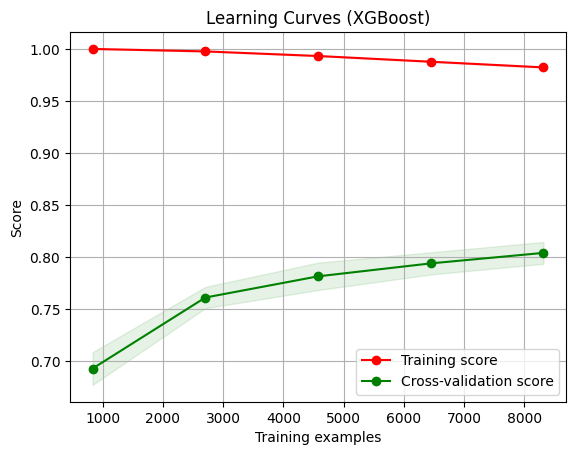

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(grid_search_xgb.best_estimator_, "Learning Curves (XGBoost)", X_train, y_train, cv=kf, n_jobs=-1)
plt.show()


> # Feature Importance

In [73]:
model_final = best_xgb

# predict
y_pred = model_final.predict(X_test)

In [74]:
features = list(transformer.get_feature_names_out())

list_features = []

for feature in features:
    list_features.append('_'.join(feature.split('_')[2:]))
list_features

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'population_per_household',
 'ocean_proximity_<1H OCEAN',
 'ocean_proximity_INLAND',
 'ocean_proximity_ISLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN',
 '_longitude',
 '_latitude']

In [75]:
# assign featire importance to variable
imp = model_final[-1].feature_importances_
imp

array([0.00949254, 0.00584066, 0.00731183, 0.00547552, 0.00643667,
       0.1151217 , 0.02370417, 0.02938824, 0.03664454, 0.6108645 ,
       0.        , 0.03964521, 0.05624885, 0.02818554, 0.02563997],
      dtype=float32)

In [76]:
# to dataframe
features_imp = pd.DataFrame({
    'Importance' : imp,
    "Feature" : list_features
}).sort_values(by='Importance', ascending=False)
features_imp

,Importance,Feature
9,0.610865,ocean_proximity_INLAND
5,0.115122,median_income
12,0.056249,ocean_proximity_NEAR OCEAN
11,0.039645,ocean_proximity_NEAR BAY
8,0.036645,ocean_proximity_<1H OCEAN
7,0.029388,population_per_household
13,0.028186,_longitude
14,0.025640,_latitude
6,0.023704,rooms_per_household
0,0.009493,housing_median_age


<Axes: xlabel='Importance', ylabel='Feature'>

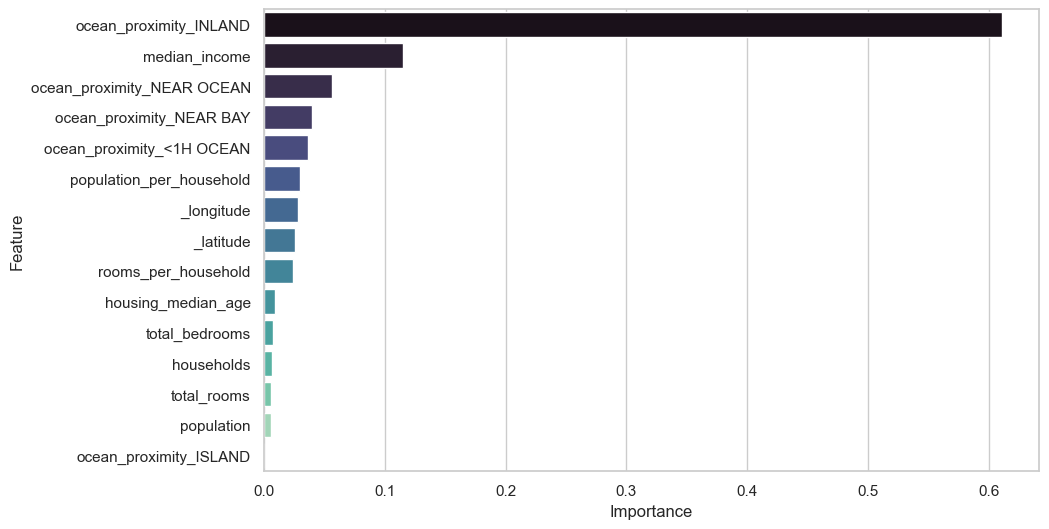

In [77]:
# visualization 
plt.figure(figsize=(10,6))
sns.set_theme(style='whitegrid')
sns.barplot(data=features_imp,x='Importance', y='Feature', orient='h', palette='mako')

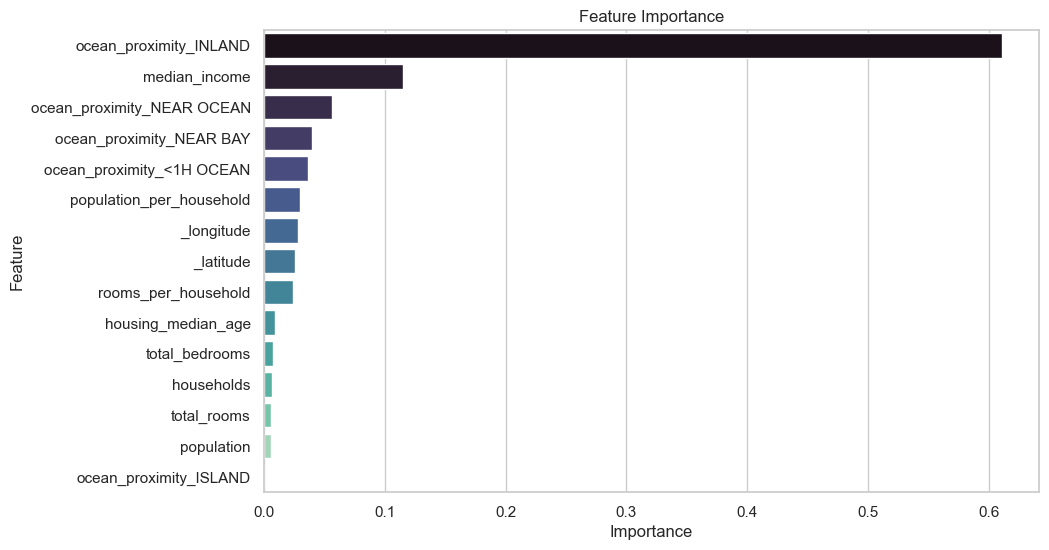

In [78]:
# predict
y_pred = model_final.predict(X_test)

# Get feature names
features = list(transformer.get_feature_names_out())

# Extract and clean feature names
list_features = ['_'.join(feature.split('_')[2:]) for feature in features]

# Assign feature importance to a variable
imp = model_final[-1].feature_importances_

# Convert to dataframe
features_imp = pd.DataFrame({
    'Importance': imp,
    'Feature': list_features
}).sort_values(by='Importance', ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
sns.set_theme(style='whitegrid')
sns.barplot(data=features_imp, x='Importance', y='Feature', orient='h', palette='mako')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Explainable AI

In [79]:
import shap

In [80]:
model_final[1].predict

<bound method XGBModel.predict of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=2020, ...)>

In [81]:
# explainer 
explainer = shap.Explainer(
    model_final[1].predict,
    model_final[0].transform(X_test)
)

shap_values = explainer( model_final[0].transform(X_test))

PermutationExplainer explainer: 2601it [03:27, 12.06it/s]                          


In [82]:
X_test.iloc[0] 

longitude                     -118.36
latitude                        34.05
housing_median_age               42.0
total_rooms                    1372.0
total_bedrooms                  435.0
population                      674.0
households                      271.0
median_income                  2.8793
ocean_proximity             <1H OCEAN
rooms_per_household          5.062731
population_per_household     2.487085
Name: 10743, dtype: object

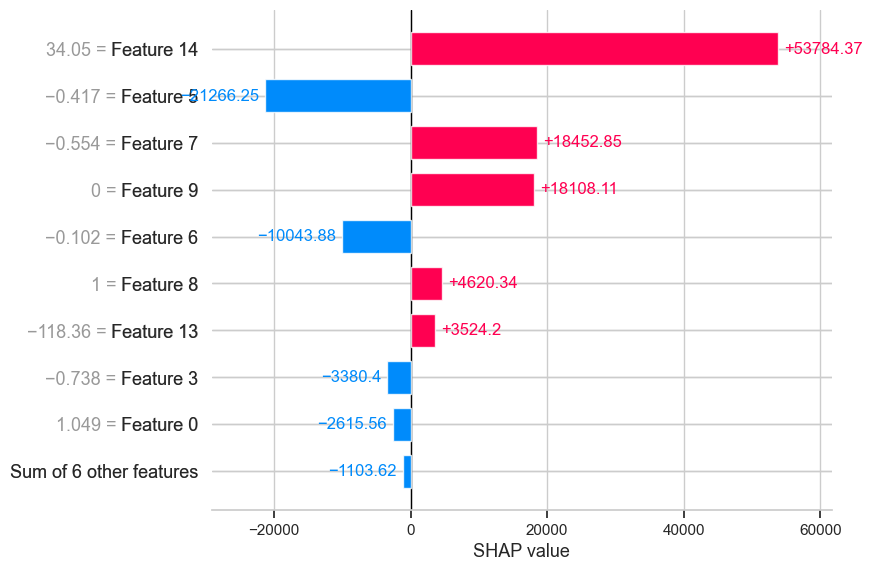

In [83]:
# shap_value for explain obvervation in test
shap.plots.bar(shap_values[0])

In [84]:
[i for i in enumerate(list_features)]

[(0, 'housing_median_age'),
 (1, 'total_rooms'),
 (2, 'total_bedrooms'),
 (3, 'population'),
 (4, 'households'),
 (5, 'median_income'),
 (6, 'rooms_per_household'),
 (7, 'population_per_household'),
 (8, 'ocean_proximity_<1H OCEAN'),
 (9, 'ocean_proximity_INLAND'),
 (10, 'ocean_proximity_ISLAND'),
 (11, 'ocean_proximity_NEAR BAY'),
 (12, 'ocean_proximity_NEAR OCEAN'),
 (13, '_longitude'),
 (14, '_latitude')]

In [85]:
# hap_value for explain all features in train
X_train_trans = model_final[0].transform(X_train)

# explainer
explainer = shap.TreeExplainer(
    model_final.named_steps['model'],
    data= X_train_trans,
    feature_perturbation='interventional',
    model_output='raw'
)

# shap values 
shap_values = explainer.shap_values(X_train_trans)

100%|===================| 10352/10400 [02:17<00:00]        

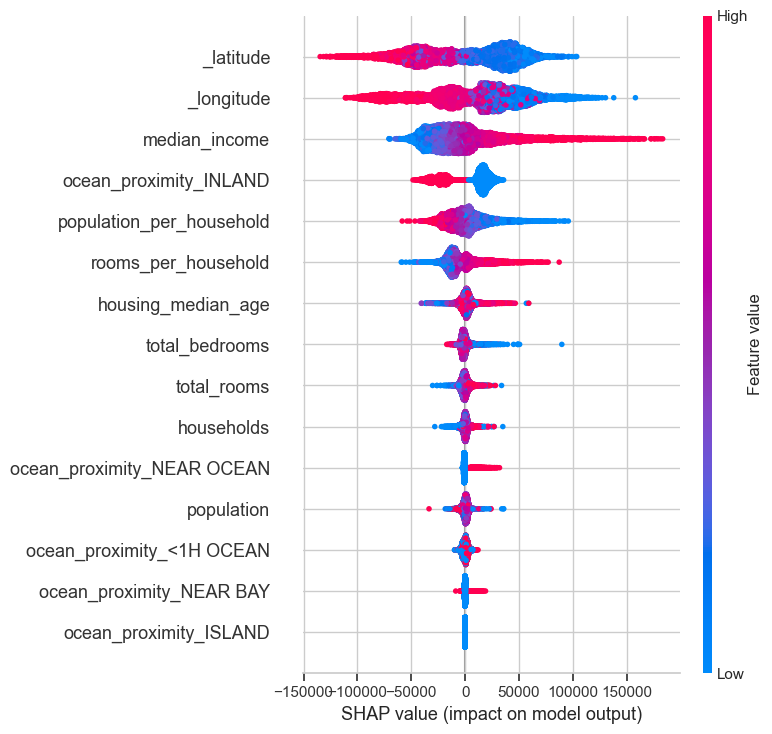

In [86]:
# summary plot for in train 
shap.summary_plot(
    shap_values,
    X_train_trans,
    feature_names=list_features  # perbaiki argumen di sini
)


In [87]:
# LIME
import lime
from lime import lime_tabular

In [88]:
# explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data = model_final[0].transform(X_train),
    feature_names = list_features,
    class_names = ['Not Buy', 'Buy'],
    mode = 'classification'
)
explainer
